# Predict Competitive ESports Outcomes

## Player Pairs Stats - Scaling Features

<b>Import libraries:</b>

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

<b>Load data:</b>

In [8]:
data = pd.read_csv('../1039_esports/data/player_pairs_stats.csv')

<b>Dataset info:</b>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match_id                  7791 non-null   int64  
 1   player                    7791 non-null   int64  
 2   player_deaths_per_min     7791 non-null   float64
 3   player_assists_per_min    7791 non-null   float64
 4   player_tower_damage       7791 non-null   int64  
 5   player_xp_per_min         7791 non-null   int64  
 6   player_gold_per_min       7791 non-null   int64  
 7   player_net_worth          7791 non-null   int64  
 8   player_kills_per_min      7791 non-null   float64
 9   player_hero_damage        7791 non-null   int64  
 10  player_last_hits          7791 non-null   int64  
 11  player_hero_id            7791 non-null   int64  
 12  player_roshans_killed     7791 non-null   float64
 13  player_obs_placed         7791 non-null   float64
 14  opponent

<b>Check for null values:</b>

In [10]:
data.isna().sum()

match_id                    0
player                      0
player_deaths_per_min       0
player_assists_per_min      0
player_tower_damage         0
player_xp_per_min           0
player_gold_per_min         0
player_net_worth            0
player_kills_per_min        0
player_hero_damage          0
player_last_hits            0
player_hero_id              0
player_roshans_killed       0
player_obs_placed           0
opponent                    0
opponent_deaths_per_min     0
opponent_assists_per_min    0
opponent_tower_damage       0
opponent_xp_per_min         0
opponent_gold_per_min       0
opponent_net_worth          0
opponent_kills_per_min      0
opponent_hero_damage        0
opponent_last_hits          0
opponent_hero_id            0
opponent_roshans_killed     0
opponent_obs_placed         0
winner                      0
dtype: int64

Drop roshans and obs columns (contains all zeroes):

In [13]:
data = data.drop(['player_roshans_killed','player_obs_placed','opponent_roshans_killed','opponent_obs_placed'], axis=1)

In [14]:
data.columns

Index(['match_id', 'player', 'player_deaths_per_min', 'player_assists_per_min',
       'player_tower_damage', 'player_xp_per_min', 'player_gold_per_min',
       'player_net_worth', 'player_kills_per_min', 'player_hero_damage',
       'player_last_hits', 'player_hero_id', 'opponent',
       'opponent_deaths_per_min', 'opponent_assists_per_min',
       'opponent_tower_damage', 'opponent_xp_per_min', 'opponent_gold_per_min',
       'opponent_net_worth', 'opponent_kills_per_min', 'opponent_hero_damage',
       'opponent_last_hits', 'opponent_hero_id', 'winner'],
      dtype='object')

In [39]:
# Keep numeric columns for analysis
data_numeric = data.loc[:, ~data.columns.isin(['match_id', 'player','player_hero_id', 'opponent','opponent_hero_id','winner'])]

In [40]:
data_numeric.describe()

,player_deaths_per_min,player_assists_per_min,player_tower_damage,player_xp_per_min,player_gold_per_min,player_net_worth,player_kills_per_min,player_hero_damage,player_last_hits,opponent_deaths_per_min,opponent_assists_per_min,opponent_tower_damage,opponent_xp_per_min,opponent_gold_per_min,opponent_net_worth,opponent_kills_per_min,opponent_hero_damage,opponent_last_hits
count,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000,7791.000000
mean,0.003420,0.005149,2634.338853,516.262354,407.528430,10935.860223,0.003230,14965.887178,112.402259,0.003202,0.005648,3016.429085,530.278783,416.255551,11172.171737,0.003419,15230.627647,111.468746
std,0.002097,0.003508,4535.163297,198.907539,151.706686,5346.898410,0.002788,8887.605054,79.483328,0.002042,0.003644,4601.211948,192.971159,148.340652,5231.559201,0.002783,8713.365767,77.691345
min,0.000000,0.000000,0.000000,5.000000,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,98.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001814,0.002515,0.000000,372.000000,295.000000,7030.500000,0.001215,8735.000000,44.000000,0.001630,0.002874,52.000000,391.000000,307.000000,7372.500000,0.001442,8951.000000,43.000000
50%,0.003213,0.004432,441.000000,494.000000,379.000000,10059.000000,0.002508,13334.000000,100.000000,0.002950,0.005051,895.000000,511.000000,391.000000,10431.000000,0.002764,13876.000000,101.000000
75%,0.004776,0.007207,3003.000000,640.500000,506.000000,14240.000000,0.004435,19451.500000,164.000000,0.004492,0.007900,3905.000000,651.000000,517.000000,14556.000000,0.004716,19886.500000,163.000000
max,0.017110,0.023317,33855.000000,1282.000000,1164.000000,34007.000000,0.029851,66067.000000,479.000000,0.021144,0.053228,30583.000000,1267.000000,1201.000000,32520.000000,0.027143,73411.000000,575.000000


### Plot numeric features (histogram, boxplot, qqplot)

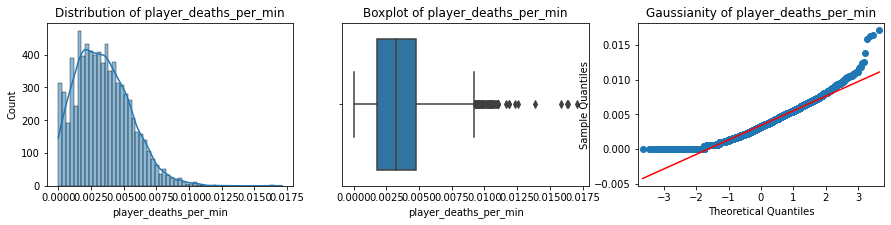

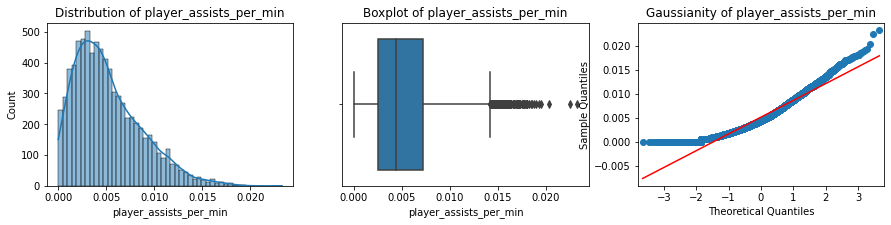

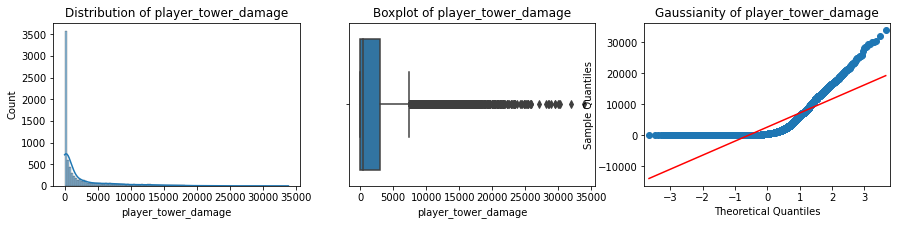

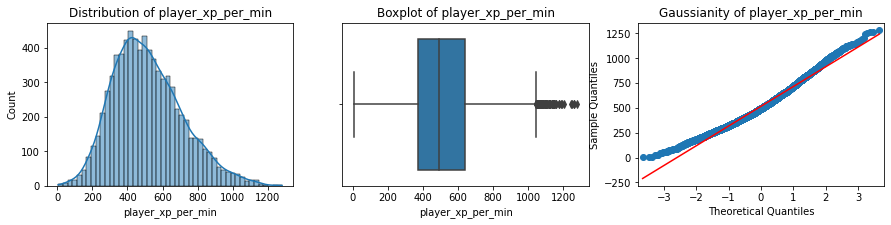

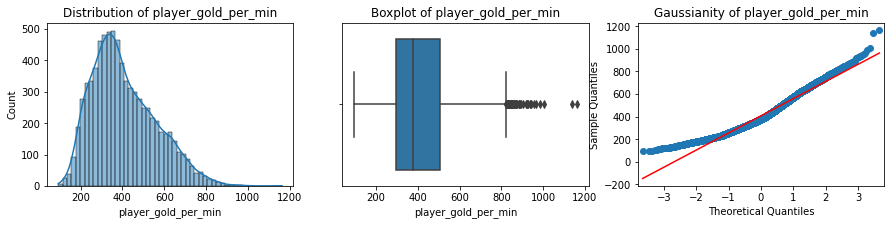

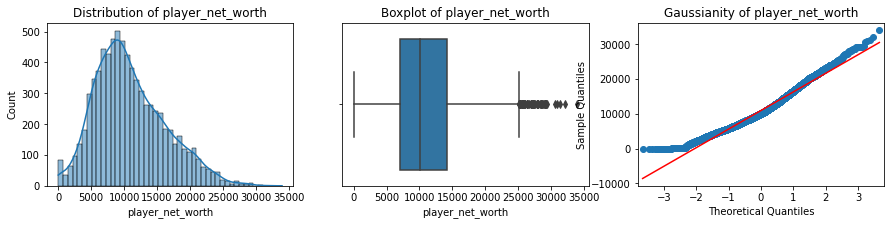

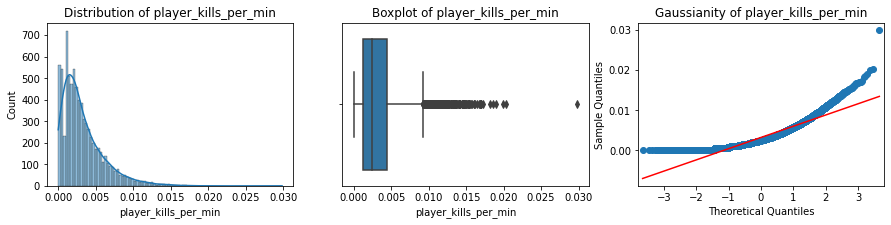

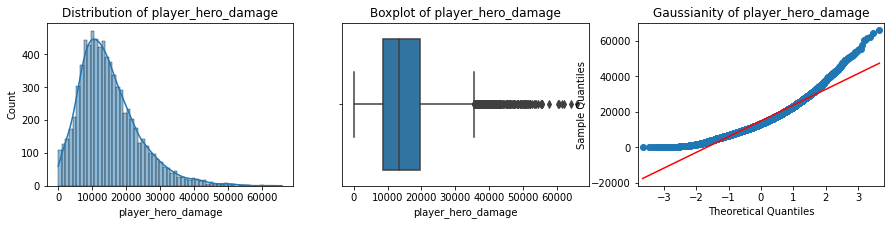

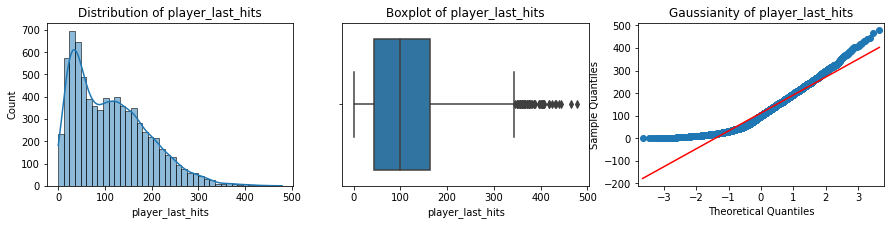

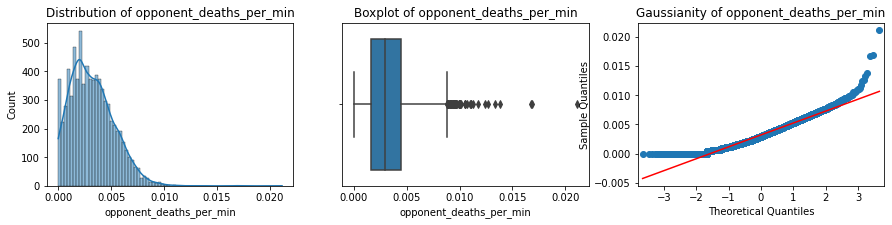

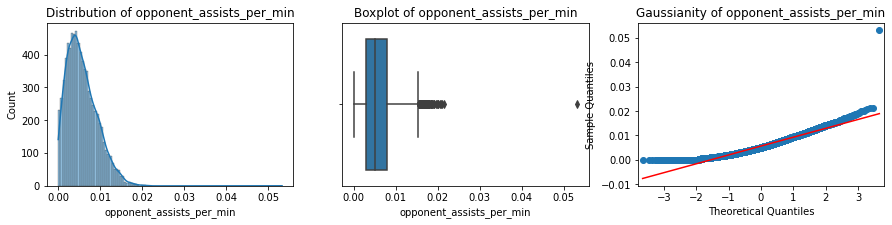

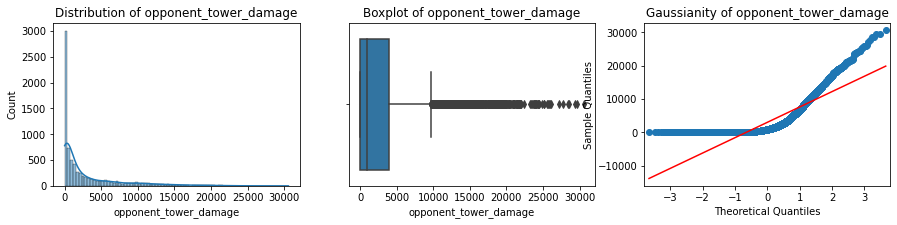

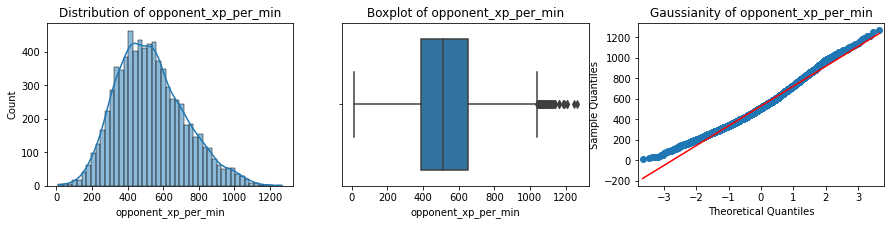

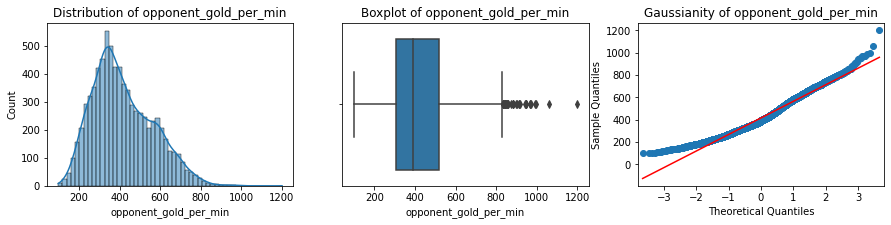

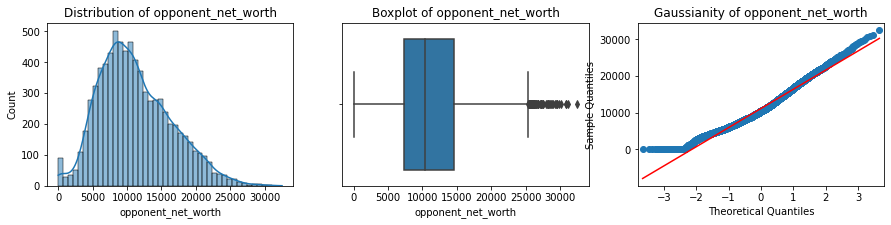

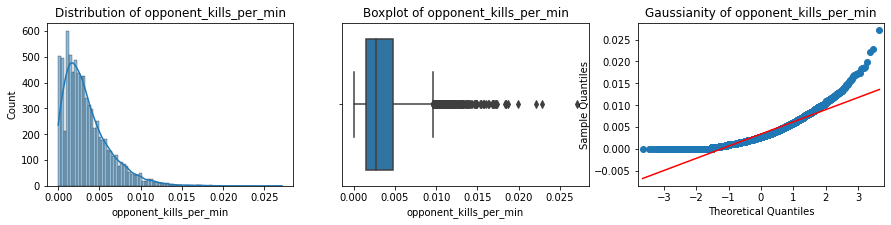

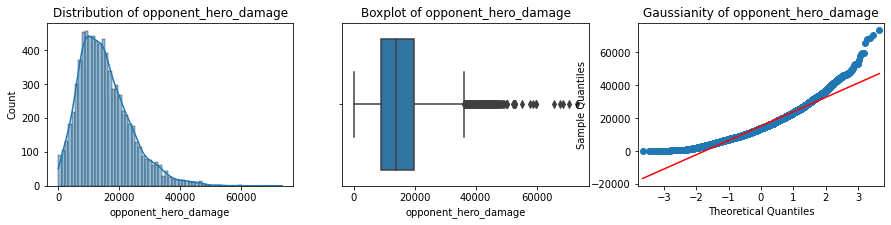

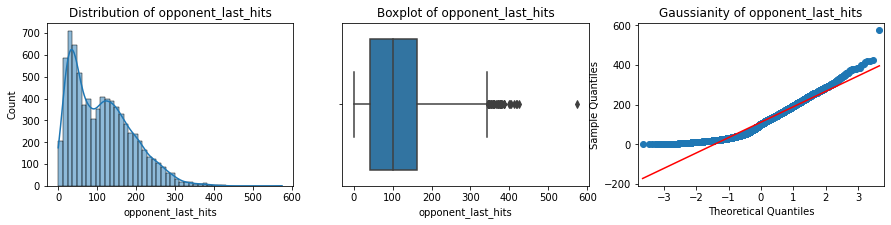

In [85]:
for feature in data_numeric.columns:
     # Three subplots per feature
    fig, ax =plt.subplots(1,3,figsize=(15,3))
    
    # Histogram - assess distribution of each feature
    ax[0].set_title(f"Distribution of {feature}")
    sns.histplot(data = data_numeric, x = feature, kde=True, ax = ax[0])
    
    # Boxplot - detect outliers
    ax[1].set_title(f"Boxplot of {feature}")
    sns.boxplot(data = data_numeric, x = feature, ax=ax[1])
    
    # qqplot - analyze if feature is normally distributed
    ax[2].set_title(f"Gaussianity of {feature}")
    qqplot(data_numeric[feature],line='s',ax=ax[2]);

Based on above, robust scaling will be applied to all features.